In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Install a pip package in the current Jupyter kernel
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [22]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | amderma
City not found. Skipping...
Processing Record 2 of Set 12 | tuatapere
Processing Record 3 of Set 12 | puerto ayora
Processing Record 4 of Set 12 | norman wells
Processing Record 5 of Set 12 | ushuaia
Processing Record 6 of Set 12 | east london
Processing Record 7 of Set 12 | corinto
Processing Record 8 of Set 12 | codrington
Processing Record 9 of Set 12 | georgetown
Processing Record 10 of Set 12 | lebu
Processing Record 11 of Set 12 | bredasdorp
Processing Record 12 of Set 12 | butaritari
Processing Record 13 of Set 12 | mimongo
Processing Record 14 of Set 12 | mabay
Processing Record 15 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 16 of Set 12 | nasice
Processing Record 17 of Set 12 | busselton
Processing Record 18 of Set 12 | pevek
Processing Record 19 of Set 12 | tiksi
Processing Record 20 of Set 12 | yellowknife
Processing Record 21 of Set 12 | dezful
Processing Record 2

Processing Record 34 of Set 15 | mocuba
Processing Record 35 of Set 15 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 15 | hasaki
Processing Record 37 of Set 15 | sarakhs
Processing Record 38 of Set 15 | mpika
Processing Record 39 of Set 15 | haines junction
Processing Record 40 of Set 15 | bokspits
City not found. Skipping...
Processing Record 41 of Set 15 | travagliato
Processing Record 42 of Set 15 | port hedland
Processing Record 43 of Set 15 | berlevag
Processing Record 44 of Set 15 | wahran
City not found. Skipping...
Processing Record 45 of Set 15 | batemans bay
Processing Record 46 of Set 15 | faya
Processing Record 47 of Set 15 | fort nelson
Processing Record 48 of Set 15 | ponta do sol
Processing Record 49 of Set 15 | asfi
Processing Record 50 of Set 15 | banbury
Processing Record 1 of Set 16 | pangnirtung
Processing Record 2 of Set 16 | maumere
Processing Record 3 of Set 16 | havre-saint-pierre
Processing Record 4 of Set 16 | ocos
Processing Record 5 of Se

Processing Record 17 of Set 19 | comodoro rivadavia
Processing Record 18 of Set 19 | luziania
Processing Record 19 of Set 19 | pinega
Processing Record 20 of Set 19 | yaan
Processing Record 21 of Set 19 | ambulu
Processing Record 22 of Set 19 | durango
Processing Record 23 of Set 19 | alofi
Processing Record 24 of Set 19 | gorbatov
Processing Record 25 of Set 19 | puerto baquerizo moreno
Processing Record 26 of Set 19 | meulaboh
Processing Record 27 of Set 19 | naron
Processing Record 28 of Set 19 | ostrovnoy
Processing Record 29 of Set 19 | malpura
Processing Record 30 of Set 19 | solnechnyy
Processing Record 31 of Set 19 | saint-augustin
Processing Record 32 of Set 19 | piacabucu
Processing Record 33 of Set 19 | barentu
Processing Record 34 of Set 19 | narok
Processing Record 35 of Set 19 | helong
Processing Record 36 of Set 19 | stephenville
Processing Record 37 of Set 19 | dali
Processing Record 38 of Set 19 | jacareacanga
Processing Record 39 of Set 19 | eureka
Processing Record 4

Processing Record 5 of Set 23 | camopi
Processing Record 6 of Set 23 | dossor
Processing Record 7 of Set 23 | cortez
Processing Record 8 of Set 23 | donskoy
Processing Record 9 of Set 23 | mumford
Processing Record 10 of Set 23 | toba
Processing Record 11 of Set 23 | russell
Processing Record 12 of Set 23 | kurilsk
Processing Record 13 of Set 23 | guaiba
Processing Record 14 of Set 23 | bandarbeyla
Processing Record 15 of Set 23 | santa cruz cabralia
Processing Record 16 of Set 23 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 23 | stepnoye
Processing Record 18 of Set 23 | sur
Processing Record 19 of Set 23 | charters towers
Processing Record 20 of Set 23 | tamworth
Processing Record 21 of Set 23 | puerto del rosario
Processing Record 22 of Set 23 | banjarmasin
Processing Record 23 of Set 23 | seydisehir
Processing Record 24 of Set 23 | teguldet
Processing Record 25 of Set 23 | noyabrsk
Processing Record 26 of Set 23 | alamos
Processing Record 27 of Set 23 | talt

In [25]:
len(city_data)

548

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,48.81,89,12,3.06,NZ,2021-07-27 18:41:17
1,Puerto Ayora,-0.7393,-90.3518,76.96,68,22,10.29,EC,2021-07-27 18:41:18
2,Norman Wells,65.2820,-126.8329,60.84,67,75,4.61,CA,2021-07-27 18:41:18
3,Ushuaia,-54.8000,-68.3000,37.06,87,90,4.61,AR,2021-07-27 18:41:19
4,East London,-33.0153,27.9116,76.14,17,0,10.36,ZA,2021-07-27 18:41:19
5,Corinto,37.9407,22.9573,89.71,36,0,2.77,GR,2021-07-27 18:38:20
6,Codrington,-38.2667,141.9667,52.02,85,61,23.22,AU,2021-07-27 18:41:20
7,Georgetown,5.4112,100.3354,83.89,86,20,3.00,MY,2021-07-27 18:36:23
8,Lebu,-37.6167,-73.6500,49.14,69,0,25.12,CL,2021-07-27 18:37:57
9,Bredasdorp,-34.5322,20.0403,55.27,88,100,20.71,ZA,2021-07-27 18:41:21


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuatapere,NZ,2021-07-27 18:41:17,-46.1333,167.6833,48.81,89,12,3.06
1,Puerto Ayora,EC,2021-07-27 18:41:18,-0.7393,-90.3518,76.96,68,22,10.29
2,Norman Wells,CA,2021-07-27 18:41:18,65.2820,-126.8329,60.84,67,75,4.61
3,Ushuaia,AR,2021-07-27 18:41:19,-54.8000,-68.3000,37.06,87,90,4.61
4,East London,ZA,2021-07-27 18:41:19,-33.0153,27.9116,76.14,17,0,10.36
5,Corinto,GR,2021-07-27 18:38:20,37.9407,22.9573,89.71,36,0,2.77
6,Codrington,AU,2021-07-27 18:41:20,-38.2667,141.9667,52.02,85,61,23.22
7,Georgetown,MY,2021-07-27 18:36:23,5.4112,100.3354,83.89,86,20,3.00
8,Lebu,CL,2021-07-27 18:37:57,-37.6167,-73.6500,49.14,69,0,25.12
9,Bredasdorp,ZA,2021-07-27 18:41:21,-34.5322,20.0403,55.27,88,100,20.71


In [31]:
#create the output file (csv)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract the relevant fields from the dataframe for Plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

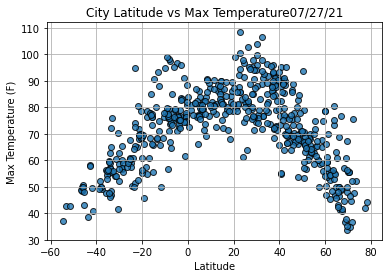

In [44]:
#Import the time module
import time

#Build the scatter plot for lat vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor ="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/fig1.png")

#Show the plot
plt.show()

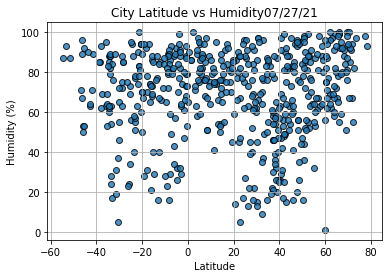

In [46]:
#Scatter build for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

#Create the other graph qualities
plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save The Figure
plt.savefig("weather_data/Fig2.png")

#Show the plot

plt.show()



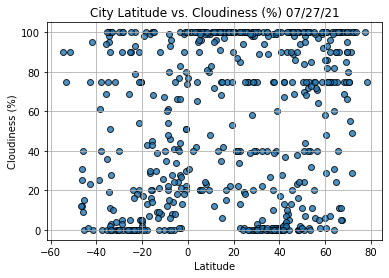

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

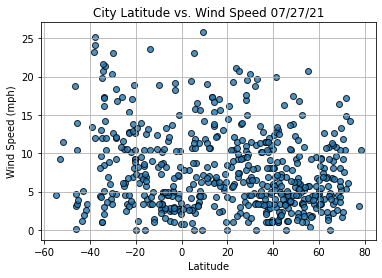

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()